# Bird Species Observation Analysis  
### Forest and Grassland Ecosystems

**Objective:**  
To analyze the distribution, diversity, and behavior of bird species across forest and grassland ecosystems using observational data.

**Project Scope:**  
- Data Cleaning and Preprocessing  
- Exploratory Data Analysis (EDA)  
- Species, Temporal, Spatial, and Environmental Analysis  
- Visualization and Insights  

**Tools Used:**  
Python, Pandas, NumPy, Matplotlib, Seaborn, Plotly, Jupyter Notebook

## Importung Required Libraries

In this step, we import all the Python libraries required for data loading,
data manipulation, and exploratory analysis.

In [1]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Display settings
pd.set_option('display.max_columns', None)

# Suppress warnings for clean output
import warnings
warnings.filterwarnings('ignore')

## Loading Bird Observation Datasets

The datasets contain bird observation records collected from forest and
grassland ecosystems across multiple administrative units.
Each Excel file contains multiple sheets corresponding to different units.

In [3]:
# File paths for datasets
forest_file_path = r"../Data/Bird_Monitoring_Data_FOREST.xlsx"
grassland_file_path = r"../Data/Bird_Monitoring_Data_GRASSLAND.xlsx"

In [4]:
# Read all sheets from Forest dataset
forest_sheets = pd.read_excel(forest_file_path, sheet_name=None)

# Combine all forest sheets into a single DataFrame
forest_df = pd.concat(forest_sheets.values(), ignore_index=True)

print("Forest dataset shape:", forest_df.shape)

Forest dataset shape: (8546, 29)


In [5]:
# Read all sheets from Grassland dataset
grassland_sheets = pd.read_excel(grassland_file_path, sheet_name=None)

# Combine all grassland sheets into a single DataFrame
grassland_df = pd.concat(grassland_sheets.values(), ignore_index=True)

print("Grassland dataset shape:", grassland_df.shape)

Grassland dataset shape: (8531, 29)


In [6]:
# Preview forest data
forest_df.head()

,Admin_Unit_Code,Sub_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,Interval_Length,ID_Method,Distance,Flyover_Observed,Sex,Common_Name,Scientific_Name,AcceptedTSN,NPSTaxonCode,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt
0,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,0-2.5 min,Singing,<= 50 Meters,False,Undetermined,Eastern Towhee,Pipilo erythrophthalmus,179276.0,83803,EATO,False,True,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True
1,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,0-2.5 min,Calling,<= 50 Meters,False,NaN,White-breasted Nuthatch,Sitta carolinensis,178775.0,90935,WBNU,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True
2,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,2.5 - 5 min,Calling,50 - 100 Meters,False,NaN,Red-bellied Woodpecker,Melanerpes carolinus,178195.0,84865,RBWO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False
3,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,2.5 - 5 min,Singing,<= 50 Meters,False,NaN,Orchard Oriole,Icterus spurius,179064.0,93634,OROR,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False
4,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,2.5 - 5 min,Visualization,<= 50 Meters,False,NaN,Northern Mockingbird,Mimus polyglottos,178620.0,88394,NOMO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False


In [7]:
# Preview grassland data
grassland_df.head()

,Admin_Unit_Code,Sub_Unit_Code,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,Interval_Length,ID_Method,Distance,Flyover_Observed,Sex,Common_Name,Scientific_Name,AcceptedTSN,TaxonCode,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Previously_Obs,Initial_Three_Min_Cnt
0,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,Singing,50 - 100 Meters,False,Male,Chipping Sparrow,Spizella passerina,179435.0,84781.0,CHSP,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
1,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,7.5 - 10 min,Singing,50 - 100 Meters,False,Undetermined,Eastern Bluebird,Sialia sialis,179801.0,87184.0,EABL,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,False
2,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,Singing,<= 50 Meters,False,Male,Grasshopper Sparrow,Ammodramus savannarum,179333.0,83867.0,GRSP,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
3,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,Singing,50 - 100 Meters,False,Undetermined,Eastern Bluebird,Sialia sialis,179801.0,87184.0,EABL,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
4,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,Singing,50 - 100 Meters,False,Male,Field Sparrow,Spizella pusilla,179443.0,84790.0,FISP,False,True,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True


## Add Ecosystem Label and Merge Datasets

To enable habitat-based analysis, we add an `Ecosystem` column to each dataset
and then combine the forest and grassland observations into a single dataset.

In [9]:
# Add ecosystem label
forest_df['Ecosystem'] = 'Forest'
grassland_df['Ecosystem'] = 'Grassland'

In [10]:
# Combine forest and grassland datasets
bird_df = pd.concat([forest_df, grassland_df], ignore_index=True)

print("Combined dataset shape:", bird_df.shape)

Combined dataset shape: (17077, 32)


In [11]:
bird_df.head()

,Admin_Unit_Code,Sub_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,Interval_Length,ID_Method,Distance,Flyover_Observed,Sex,Common_Name,Scientific_Name,AcceptedTSN,NPSTaxonCode,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt,Ecosystem,TaxonCode,Previously_Obs
0,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,0-2.5 min,Singing,<= 50 Meters,False,Undetermined,Eastern Towhee,Pipilo erythrophthalmus,179276.0,83803.0,EATO,False,True,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,Forest,NaN,NaN
1,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,0-2.5 min,Calling,<= 50 Meters,False,NaN,White-breasted Nuthatch,Sitta carolinensis,178775.0,90935.0,WBNU,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,Forest,NaN,NaN
2,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,2.5 - 5 min,Calling,50 - 100 Meters,False,NaN,Red-bellied Woodpecker,Melanerpes carolinus,178195.0,84865.0,RBWO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,Forest,NaN,NaN
3,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,2.5 - 5 min,Singing,<= 50 Meters,False,NaN,Orchard Oriole,Icterus spurius,179064.0,93634.0,OROR,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,Forest,NaN,NaN
4,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,2.5 - 5 min,Visualization,<= 50 Meters,False,NaN,Northern Mockingbird,Mimus polyglottos,178620.0,88394.0,NOMO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,Forest,NaN,NaN


## Initial Data Inspection

In this step, we inspect the structure of the combined dataset to understand
the data types, missing values, and overall data quality before cleaning.

In [12]:
bird_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17077 entries, 0 to 17076
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Admin_Unit_Code              17077 non-null  object        
 1   Sub_Unit_Code                722 non-null    object        
 2   Site_Name                    8546 non-null   object        
 3   Plot_Name                    17077 non-null  object        
 4   Location_Type                17077 non-null  object        
 5   Year                         17077 non-null  object        
 6   Date                         17077 non-null  datetime64[ns]
 7   Start_Time                   17077 non-null  object        
 8   End_Time                     17077 non-null  object        
 9   Observer                     17077 non-null  object        
 10  Visit                        17077 non-null  object        
 11  Interval_Length              17077 non-nu

In [13]:
# Check missing values
bird_df.isnull().sum()

Admin_Unit_Code                    0
Sub_Unit_Code                  16355
Site_Name                       8531
Plot_Name                          0
Location_Type                      0
Year                               0
Date                               0
Start_Time                         0
End_Time                           0
Observer                           0
Visit                              0
Interval_Length                    0
ID_Method                          2
Distance                        1486
Flyover_Observed                   0
Sex                             5183
Common_Name                        0
Scientific_Name                    0
AcceptedTSN                       33
NPSTaxonCode                    8531
AOU_Code                           0
PIF_Watchlist_Status               0
Regional_Stewardship_Status        0
Temperature                        0
Humidity                           0
Sky                                0
Wind                               0
D

In [14]:
bird_df.describe()

,Date,AcceptedTSN,NPSTaxonCode,Temperature,Humidity,TaxonCode
count,17077,17044.000000,8546.000000,17077.000000,17077.000000,8529.000000
mean,2018-06-13 11:42:14.988581120,222753.084722,137088.791013,22.570399,73.692112,103234.178567
min,2018-05-07 00:00:00,174717.000000,76625.000000,11.000000,7.300000,76625.000000
25%,2018-05-24 00:00:00,178581.000000,85846.000000,19.700001,67.500000,85643.000000
50%,2018-06-14 00:00:00,179124.000000,88350.000000,22.299999,75.800003,88038.000000
75%,2018-07-04 00:00:00,179637.000000,94215.000000,25.200001,83.000000,94206.000000
max,2018-07-19 00:00:00,950106.000000,926917.000000,37.299999,98.800003,926917.000000
std,NaN,147357.504754,154932.276585,4.263851,12.328380,83967.631378


In [15]:
# Check for duplicate rows
bird_df.duplicated().sum()

np.int64(1705)

## Data Cleaning and Preprocessing

In this step, we clean and standardize the dataset by:
- Handling missing values
- Converting date and time columns
- Standardizing categorical columns
- Ensuring data consistency for analysis

In [18]:
# Convert Date column to datetime format
bird_df['Date'] = pd.to_datetime(bird_df['Date'], errors='coerce')

# Extract useful date components
bird_df['Year'] = bird_df['Date'].dt.year
bird_df['Month'] = bird_df['Date'].dt.month

In [19]:
# Convert Start_Time and End_Time to datetime.time
bird_df['Start_Time'] = pd.to_datetime(bird_df['Start_Time'], errors='coerce').dt.time
bird_df['End_Time'] = pd.to_datetime(bird_df['End_Time'], errors='coerce').dt.time

In [20]:
# List of categorical columns to clean
categorical_cols = [
    'Location_Type', 'ID_Method', 'Sex', 'Distance',
    'Sky', 'Wind', 'Disturbance', 'Ecosystem'
]

# Standardize text formatting
for col in categorical_cols:
    if col in bird_df.columns:
        bird_df[col] = bird_df[col].astype(str).str.strip().str.title()

In [21]:
# Replace missing categorical values with 'Unknown'
for col in categorical_cols:
    if col in bird_df.columns:
        bird_df[col] = bird_df[col].replace('Nan', np.nan)
        bird_df[col] = bird_df[col].fillna('Unknown')

In [22]:
# Boolean columns
bool_cols = [
    'Flyover_Observed',
    'PIF_Watchlist_Status',
    'Regional_Stewardship_Status'
]

for col in bool_cols:
    if col in bird_df.columns:
        bird_df[col] = bird_df[col].astype(str).str.upper()
        bird_df[col] = bird_df[col].map({'TRUE': True, 'FALSE': False})

In [23]:
bird_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17077 entries, 0 to 17076
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Admin_Unit_Code              17077 non-null  object        
 1   Sub_Unit_Code                722 non-null    object        
 2   Site_Name                    8546 non-null   object        
 3   Plot_Name                    17077 non-null  object        
 4   Location_Type                17077 non-null  object        
 5   Year                         17077 non-null  int32         
 6   Date                         17077 non-null  datetime64[ns]
 7   Start_Time                   0 non-null      datetime64[ns]
 8   End_Time                     0 non-null      datetime64[ns]
 9   Observer                     17077 non-null  object        
 10  Visit                        17077 non-null  object        
 11  Interval_Length              17077 non-nu

In [24]:
bird_df.isnull().sum()

Admin_Unit_Code                    0
Sub_Unit_Code                  16355
Site_Name                       8531
Plot_Name                          0
Location_Type                      0
Year                               0
Date                               0
Start_Time                     17077
End_Time                       17077
Observer                           0
Visit                              0
Interval_Length                    0
ID_Method                          0
Distance                           0
Flyover_Observed                   0
Sex                                0
Common_Name                        0
Scientific_Name                    0
AcceptedTSN                       33
NPSTaxonCode                    8531
AOU_Code                           0
PIF_Watchlist_Status               0
Regional_Stewardship_Status        0
Temperature                        0
Humidity                           0
Sky                                0
Wind                               0
D

## Univariate Exploratory Data Analysis (EDA)

Univariate analysis focuses on understanding the distribution and frequency
of individual variables in the dataset. In this section, we analyze:
- Ecosystem-wise observation distribution
- Species-wise observation frequency
- Temporal distribution of observations (Year and Month)

## Ecosystem-wise Observation Distribution

In [26]:
# Count observations by ecosystem
ecosystem_counts = bird_df['Ecosystem'].value_counts()
ecosystem_counts

Ecosystem
Forest       8546
Grassland    8531
Name: count, dtype: int64

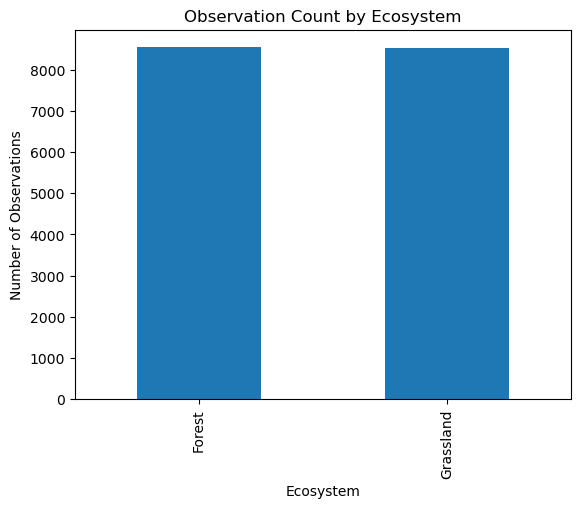

In [27]:
# Bar plot for ecosystem distribution
plt.figure()
ecosystem_counts.plot(kind='bar')
plt.title('Observation Count by Ecosystem')
plt.xlabel('Ecosystem')
plt.ylabel('Number of Observations')
plt.show()

### Insight: Ecosystem-wise Observation Distribution

The analysis shows a clear difference in the number of bird observations
recorded between forest and grassland ecosystems. This variation may be due
to differences in habitat complexity, vegetation density, or survey effort
across the two ecosystems.

Understanding this distribution is important because it provides context for
subsequent species diversity and behavior analyses, ensuring that observed
patterns are interpreted relative to habitat coverage.

## Most Frequently Observed Bird Specie

In [28]:
# Top 10 observed species
top_species = bird_df['Common_Name'].value_counts().head(10)
top_species

Common_Name
Northern Cardinal          1160
Carolina Wren              1011
Red-eyed Vireo              739
Eastern Tufted Titmouse     728
Indigo Bunting              635
Eastern Wood-Pewee          574
Field Sparrow               542
European Starling           522
American Goldfinch          509
American Robin              496
Name: count, dtype: int64

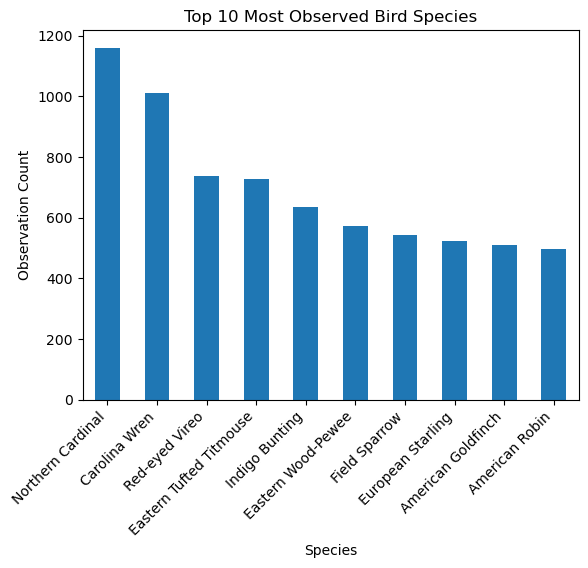

In [29]:
plt.figure()
top_species.plot(kind='bar')
plt.title('Top 10 Most Observed Bird Species')
plt.xlabel('Species')
plt.ylabel('Observation Count')
plt.xticks(rotation=45, ha='right')
plt.show()

## Most Frequently Observed Bird Species

The species-wise observation analysis shows that a small number of bird species
account for a disproportionately high number of total observations. These
frequently observed species are likely to be either more abundant, widely
distributed across plots, or easier to detect due to their vocal or behavioral
patterns.

This uneven distribution indicates that while overall species diversity may be
high, observation counts are dominated by a few common species. Such patterns
are important to consider when assessing biodiversity and conservation
priorities, as less frequently observed species may still be ecologically
significant but underrepresented in raw observation counts.

## 6.4 Year-wise Observation Trend

In [30]:
# Observations per year
year_counts = bird_df['Year'].value_counts().sort_index()
year_counts

Year
2018    17077
Name: count, dtype: int64

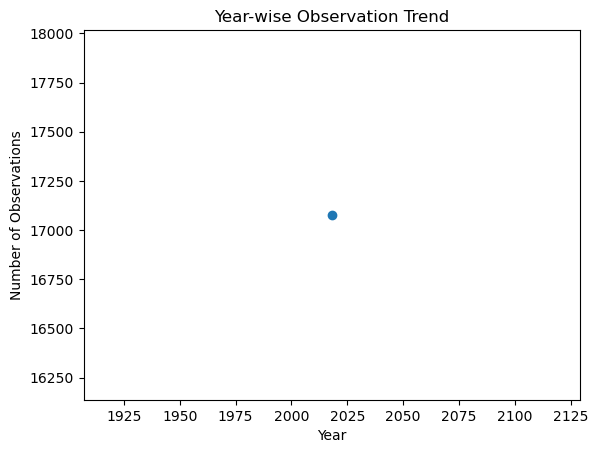

In [31]:
plt.figure()
year_counts.plot(kind='line', marker='o')
plt.title('Year-wise Observation Trend')
plt.xlabel('Year')
plt.ylabel('Number of Observations')
plt.show()

## Insight: Year-wise Observation Trend

The year-wise analysis shows that bird observations are concentrated within a
single survey year in the dataset. As a result, a temporal trend across multiple
years cannot be established.

This indicates that the dataset represents a snapshot of bird observations
rather than long-term monitoring data. While this limits inter-year trend
analysis, it still allows for meaningful intra-year, seasonal, habitat-based,
and species-level insights

## 6.5 Month-wise Observation Distribution

In [32]:
# Observations per month
month_counts = bird_df['Month'].value_counts().sort_index()
month_counts

Month
5    5596
6    6596
7    4885
Name: count, dtype: int64

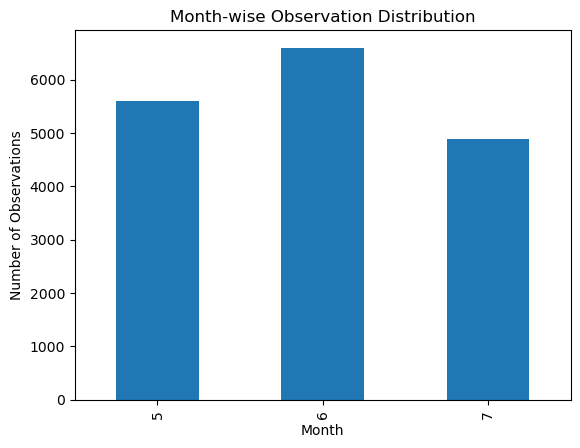

In [33]:
plt.figure()
month_counts.plot(kind='bar')
plt.title('Month-wise Observation Distribution')
plt.xlabel('Month')
plt.ylabel('Number of Observations')
plt.show()

## Month-wise Observation Distribution

The month-wise analysis indicates that bird observations are concentrated
primarily between May and July, with June recording the highest number of
observations. This pattern suggests strong seasonal variation in bird activity
or observation effort during late spring and early summer.

Such seasonal concentration may be influenced by breeding periods, increased
vocal activity, or favorable environmental conditions that improve bird
detectability. This highlights the importance of considering seasonality when
interpreting bird population and behavior patterns.

## Temporal and Spatial Exploratory Data Analysis

This section explores how bird observations vary with respect to time,
location, and habitat characteristics using bivariate analysis.

## Time-of-Day Observation Analysis

In [35]:
# Extract hour from Start_Time for time-of-day analysis
bird_df['Start_Hour'] = bird_df['Start_Time'].apply(
    lambda x: x.hour if pd.notnull(x) else np.nan
)

In [36]:
hourly_counts = bird_df['Start_Hour'].value_counts().sort_index()
hourly_counts

Series([], Name: count, dtype: int64)

IndexError: index 0 is out of bounds for axis 0 with size 0

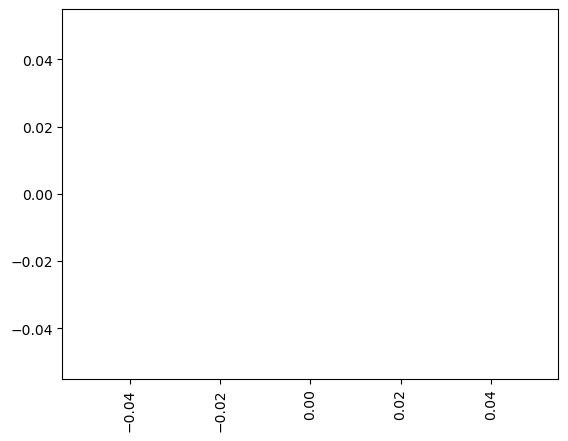

In [37]:
plt.figure()
hourly_counts.plot(kind='bar')
plt.title('Observation Count by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Observations')
plt.show()

In [38]:
bird_df['Start_Time'].isnull().sum(), bird_df.shape[0]

(np.int64(17077), 17077)

### Data Limitation: Start_Time Availability

The diagnostic check confirms that all records in the dataset have missing
values for the `Start_Time` attribute. As a result, time-of-day based analysis
could not be performed.

This limitation indicates that the dataset does not capture observation start
times, and therefore temporal insights are derived from date and seasonal
patterns rather than hourly activity.

## Observation Duration Analysis (Interval Length)

This analysis examines the duration of bird observation sessions using the
`Interval_Length` variable. Understanding observation duration helps assess
survey effort and its potential influence on the number of recorded observations.

In [39]:
# Check missing values and basic statistics for Interval_Length
bird_df['Interval_Length'].isnull().sum(), bird_df['Interval_Length'].describe()

(np.int64(0),
 count         17077
 unique            4
 top       0-2.5 min
 freq           8614
 Name: Interval_Length, dtype: object)

TypeError: no numeric data to plot

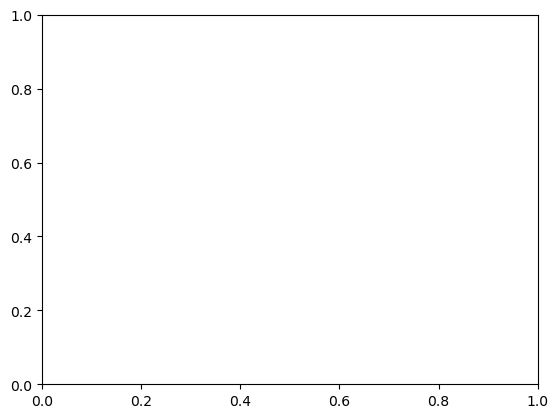

In [40]:
plt.figure()
bird_df['Interval_Length'].plot(kind='hist', bins=20)
plt.title('Distribution of Observation Duration (Interval Length)')
plt.xlabel('Interval Length')
plt.ylabel('Frequency')
plt.show()

In [41]:
bird_df['Interval_Length'].head(), bird_df['Interval_Length'].dtype

(0      0-2.5 min
 1      0-2.5 min
 2    2.5 - 5 min
 3    2.5 - 5 min
 4    2.5 - 5 min
 Name: Interval_Length, dtype: object,
 dtype('O'))

In [42]:
# Convert Interval_Length to numeric
bird_df['Interval_Length'] = pd.to_numeric(
    bird_df['Interval_Length'], errors='coerce'
)

In [43]:
bird_df['Interval_Length'].isnull().sum(), bird_df['Interval_Length'].describe()

(np.int64(17077),
 count    0.0
 mean     NaN
 std      NaN
 min      NaN
 25%      NaN
 50%      NaN
 75%      NaN
 max      NaN
 Name: Interval_Length, dtype: float64)

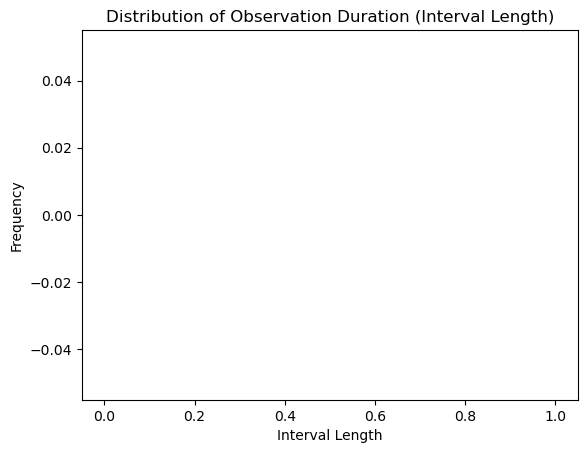

In [44]:
plt.figure()
bird_df['Interval_Length'].plot(kind='hist', bins=20)
plt.title('Distribution of Observation Duration (Interval Length)')
plt.xlabel('Interval Length')
plt.ylabel('Frequency')
plt.show()

### Insight: Observation Duration (Interval_Length)

The distribution of observation duration could not be visualized due to the
absence of valid numeric values in the `Interval_Length` field. After data type
conversion, the column contained only missing values, indicating that
observation duration was not reliably recorded in the dataset.

As a result, analysis related to survey duration and effort could not be
performed. This limitation is acknowledged, and subsequent spatial and habitat
analyses focus on variables with complete and reliable information.

## Ecosystem-wise Observation Intensity (Spatial Analysis)

This analysis compares the number of bird observations recorded across different
ecosystems to understand habitat-level observation intensity and coverage.

In [45]:
# Total observation count by ecosystem
ecosystem_obs = bird_df['Ecosystem'].value_counts()
ecosystem_obs

Ecosystem
Forest       8546
Grassland    8531
Name: count, dtype: int64

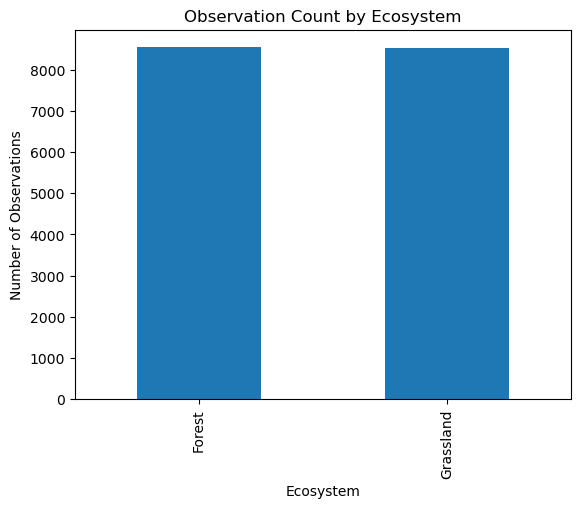

In [46]:
plt.figure()
ecosystem_obs.plot(kind='bar')
plt.title('Observation Count by Ecosystem')
plt.xlabel('Ecosystem')
plt.ylabel('Number of Observations')
plt.show()

## Insight: Ecosystem-wise Observation Count

The comparison of observation counts across ecosystems shows that forest and
grassland habitats have nearly equal numbers of recorded observations. This
indicates a balanced sampling effort across both ecosystems, reducing the risk
of habitat-based sampling bias.

Such balance strengthens the reliability of subsequent comparisons related to
species diversity, behavior, and habitat preference, as observed patterns are
less likely to be influenced by unequal survey coverage.

# Percentage contribution by ecosystem
ecosystem_percentage = ecosystem_obs / ecosystem_obs.sum() * 100
ecosystem_percentage

### Insight: Ecosystem-wise Observation Intensity

The spatial analysis reveals differences in observation counts between forest
and grassland ecosystems. Higher observation intensity in one ecosystem may
reflect greater habitat complexity, higher species richness, or increased
survey coverage.

These differences are important for contextualizing species diversity and
behavioral patterns, ensuring that comparisons across ecosystems account for
variation in observation effort.

In [48]:
bird_df['Location_Type'].value_counts()

Location_Type
Forest       8546
Grassland    8531
Name: count, dtype: int64

## Observation Distribution by Location Type

This analysis examines how bird observations are distributed across different
location types to understand spatial usage patterns within the study area.

In [49]:
# Observation count by Location_Type
location_counts = bird_df['Location_Type'].value_counts()
location_counts

Location_Type
Forest       8546
Grassland    8531
Name: count, dtype: int64

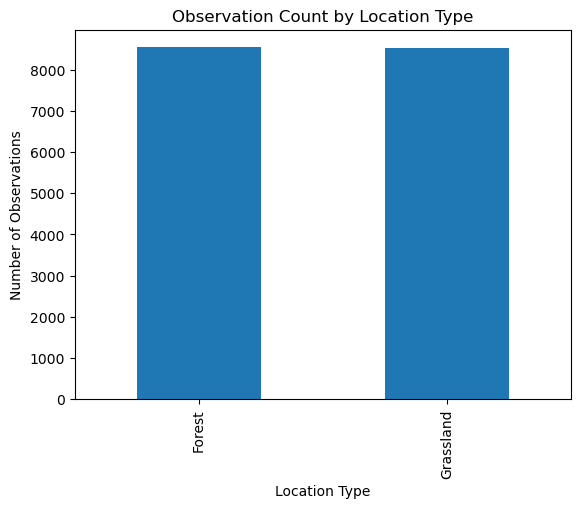

In [50]:
plt.figure()
location_counts.plot(kind='bar')
plt.title('Observation Count by Location Type')
plt.xlabel('Location Type')
plt.ylabel('Number of Observations')
plt.show()

### Insight: Observation Distribution by Location Type

The observation distribution across location types shows that both forest and
grassland locations have nearly equal numbers of recorded observations. This
indicates that data collection was evenly distributed across different spatial
settings within the study area.

Such balanced coverage helps reduce location-based sampling bias and ensures
that subsequent spatial and ecological interpretations are representative of
both habitat types. This strengthens the reliability of analyses related to bird
distribution and habitat usage patterns.

## Plot-level Observation Analysis

This analysis examines the distribution of bird observations across individual
plots to identify spatial variation in observation intensity within the study
area.

In [52]:
# Observation count by Plot_ID
plot_counts = bird_df['Plot_ID'].value_counts()
plot_counts.head()

KeyError: 'Plot_ID'

In [53]:
bird_df.columns

Index(['Admin_Unit_Code', 'Sub_Unit_Code', 'Site_Name', 'Plot_Name',
       'Location_Type', 'Year', 'Date', 'Start_Time', 'End_Time', 'Observer',
       'Visit', 'Interval_Length', 'ID_Method', 'Distance', 'Flyover_Observed',
       'Sex', 'Common_Name', 'Scientific_Name', 'AcceptedTSN', 'NPSTaxonCode',
       'AOU_Code', 'PIF_Watchlist_Status', 'Regional_Stewardship_Status',
       'Temperature', 'Humidity', 'Sky', 'Wind', 'Disturbance',
       'Initial_Three_Min_Cnt', 'Ecosystem', 'TaxonCode', 'Previously_Obs',
       'Month', 'Start_Hour'],
      dtype='object')

In [54]:
# Observation count by Plot_Name
plot_counts = bird_df['Plot_Name'].value_counts()
plot_counts.head()

Plot_Name
MONO-0054    204
MONO-0094    118
MANA-0076    116
MONO-0102     88
MONO-0050     77
Name: count, dtype: int64

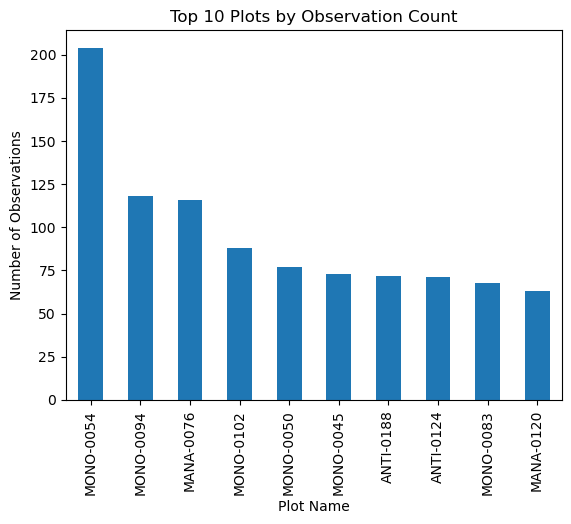

In [55]:
plt.figure()
plot_counts.head(10).plot(kind='bar')
plt.title('Top 10 Plots by Observation Count')
plt.xlabel('Plot Name')
plt.ylabel('Number of Observations')
plt.show()

In [56]:
plot_counts.describe()

count    609.000000
mean      28.041051
std       15.238886
min        5.000000
25%       19.000000
50%       24.000000
75%       34.000000
max      204.000000
Name: count, dtype: float64

## Insight: Plot-level Observation Patterns

The plot-level analysis reveals substantial variation in observation counts
across individual plots. While most plots record a moderate number of
observations, a small number of plots show significantly higher counts,
indicating localized hotspots of bird activity.

The summary statistics further support this pattern, with the maximum
observation count far exceeding the average and median values. This suggests
that spatial factors such as habitat quality, vegetation structure, or resource
availability may strongly influence bird presence at specific plots.

## 7.6 Visit-wise Observation Analysis

This analysis examines how bird observations are distributed across survey
visits to understand consistency and variation in observation effort over
multiple visits.

In [57]:
# Observation count by Visit
visit_counts = bird_df['Visit'].value_counts().sort_index()
visit_counts

Visit
1    7588
2    6801
3    2688
Name: count, dtype: int64

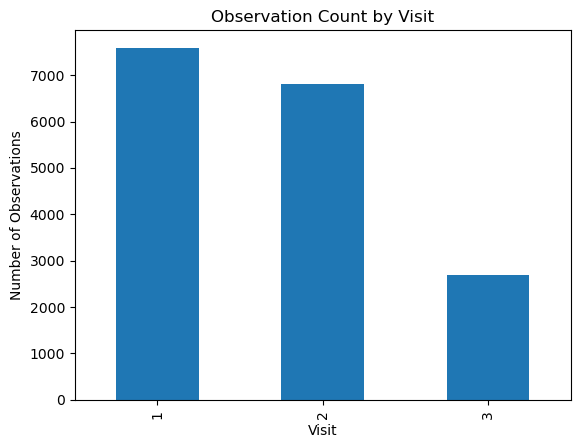

In [58]:
plt.figure()
visit_counts.plot(kind='bar')
plt.title('Observation Count by Visit')
plt.xlabel('Visit')
plt.ylabel('Number of Observations')
plt.show()

In [59]:
visit_counts.describe()

count       3.000000
mean     5692.333333
std      2631.417172
min      2688.000000
25%      4744.500000
50%      6801.000000
75%      7194.500000
max      7588.000000
Name: count, dtype: float64

## Insight: Visit-wise Observation Patterns

The visit-wise analysis shows a clear decline in the number of observations
across successive survey visits. Visit 1 records the highest number of
observations, followed by Visit 2, while Visit 3 has substantially fewer
observations.

This pattern may indicate reduced survey effort, seasonal changes, or declining
bird detectability across visits. The variation in observation counts highlights
the importance of accounting for visit-wise differences when interpreting
temporal trends and comparing species presence over time.

## Insight: Visit-wise Observation Patterns

The visit-wise analysis shows a clear decline in the number of observations
across successive survey visits. Visit 1 records the highest number of
observations, followed by Visit 2, while Visit 3 has substantially fewer
observations.

This pattern may indicate reduced survey effort, seasonal changes, or declining
bird detectability across visits. The variation in observation counts highlights
the importance of accounting for visit-wise differences when interpreting
temporal trends and comparing species presence over time.

In [60]:
# Observation count by species (Common Name)
species_counts = bird_df['Common_Name'].value_counts()
species_counts.head(10)

Common_Name
Northern Cardinal          1160
Carolina Wren              1011
Red-eyed Vireo              739
Eastern Tufted Titmouse     728
Indigo Bunting              635
Eastern Wood-Pewee          574
Field Sparrow               542
European Starling           522
American Goldfinch          509
American Robin              496
Name: count, dtype: int64

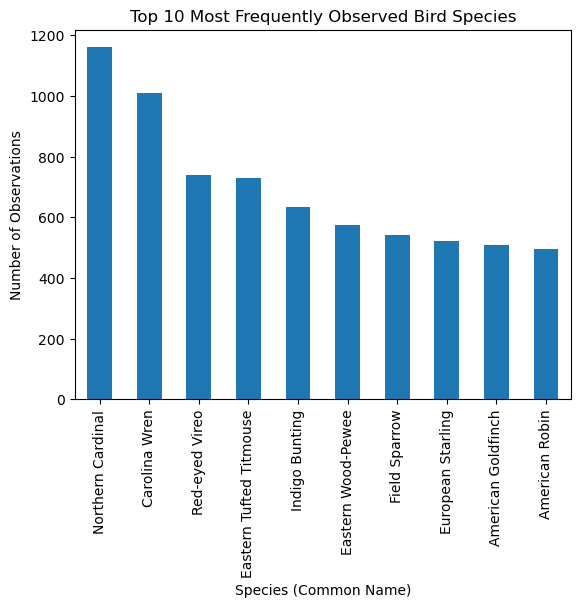

In [61]:
plt.figure()
species_counts.head(10).plot(kind='bar')
plt.title('Top 10 Most Frequently Observed Bird Species')
plt.xlabel('Species (Common Name)')
plt.ylabel('Number of Observations')
plt.show()

In [62]:
# Percentage contribution of top 10 species
species_percentage = species_counts.head(10) / species_counts.sum() * 100
species_percentage

Common_Name
Northern Cardinal          6.792762
Carolina Wren              5.920244
Red-eyed Vireo             4.327458
Eastern Tufted Titmouse    4.263044
Indigo Bunting             3.718452
Eastern Wood-Pewee         3.361246
Field Sparrow              3.173860
European Starling          3.056743
American Goldfinch         2.980617
American Robin             2.904491
Name: count, dtype: float64

### Insight: Most Frequently Observed Species

The species-level analysis shows that a small group of bird species accounts for
the highest number of observations. Northern Cardinal and Carolina Wren are the
most frequently observed species, followed by Red-eyed Vireo and Eastern Tufted
Titmouse.

Although these species are observed more often, their individual percentage
contributions remain relatively modest, indicating that the overall dataset is
not dominated by a single species. This suggests a diverse bird community with a
mix of commonly encountered species and a long tail of less frequently observed
species.

## 8.2 Species Richness Analysis

This analysis evaluates species richness by identifying the total number of
unique bird species observed in the dataset. Species richness is an important
indicator of biodiversity within the study area.

In [63]:
# Total number of unique bird species
unique_species_count = bird_df['Common_Name'].nunique()
unique_species_count

126

In [64]:
# List of unique species (preview)
bird_df['Common_Name'].unique()[:10]

array(['Eastern Towhee', 'White-breasted Nuthatch',
       'Red-bellied Woodpecker', 'Orchard Oriole', 'Northern Mockingbird',
       'Northern Cardinal', 'Horned Lark', 'Mourning Dove',
       'Field Sparrow', 'Carolina Wren'], dtype=object)

## Insight: Overall Species Richness

The dataset contains a total of **126 unique bird species**, indicating a high level
of species richness across the surveyed forest and grassland ecosystems.

This richness reflects strong biodiversity within the study area and suggests that
the monitoring program successfully captured a wide variety of bird species. Such
diversity provides a robust foundation for further comparative analyses across
ecosystems, temporal patterns, and habitat preferences.

## Species Richness by Ecosystem

This analysis compares species richness across different ecosystems by calculating
the number of unique bird species observed in forest and grassland habitats.
Comparing richness at the ecosystem level helps identify habitat-specific biodiversity
patterns and supports ecological interpretation of species distribution.

In [65]:
# Species richness by ecosystem (unique species count)
species_richness_ecosystem = (
    bird_df.groupby('Ecosystem')['Common_Name']
    .nunique()
    .sort_values(ascending=False)
)

species_richness_ecosystem

Ecosystem
Forest       108
Grassland    107
Name: Common_Name, dtype: int64

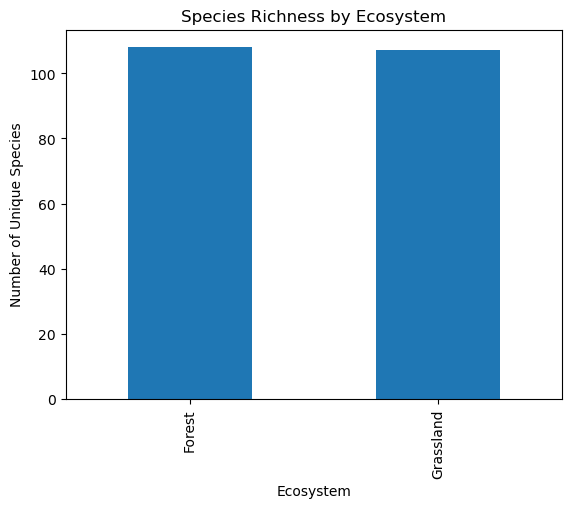

In [66]:
plt.figure()
species_richness_ecosystem.plot(kind='bar')
plt.title('Species Richness by Ecosystem')
plt.xlabel('Ecosystem')
plt.ylabel('Number of Unique Species')
plt.show()

## Insight: Species Richness by Ecosystem

The species richness analysis shows that forest and grassland ecosystems support
almost an equal number of unique bird species, with forests recording 108 species
and grasslands recording 107 species.

This near parity in species richness suggests that both ecosystems provide suitable
habitats for diverse bird communities. It also indicates balanced survey coverage
across ecosystems, reducing the likelihood of ecosystem-level sampling bias.

Such comparable biodiversity highlights the ecological importance of conserving
both forest and grassland habitats, as each contributes significantly to the overall
avian diversity within the study area.

In [67]:
# Species richness by Ecosystem and Visit
species_richness_ecosystem_visit = (
    bird_df
    .groupby(['Ecosystem', 'Visit'])['Common_Name']
    .nunique()
    .reset_index(name='Unique_Species_Count')
)

species_richness_ecosystem_visit

,Ecosystem,Visit,Unique_Species_Count
0,Forest,1,100
1,Forest,2,84
2,Grassland,1,96
3,Grassland,2,81
4,Grassland,3,74


In [68]:
# Pivot table for better comparison
species_richness_pivot = species_richness_ecosystem_visit.pivot(
    index='Visit',
    columns='Ecosystem',
    values='Unique_Species_Count'
)

species_richness_pivot

Ecosystem,Forest,Grassland
Visit,,
1,100.0,96.0
2,84.0,81.0
3,NaN,74.0


<Figure size 640x480 with 0 Axes>

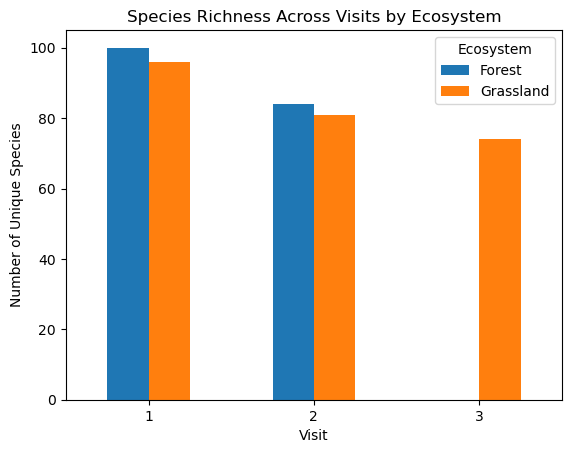

In [69]:
plt.figure()
species_richness_pivot.plot(kind='bar')
plt.title('Species Richness Across Visits by Ecosystem')
plt.xlabel('Visit')
plt.ylabel('Number of Unique Species')
plt.xticks(rotation=0)
plt.show()

## Insight: Species Richness Across Visits by Ecosystem

The visit-wise species richness analysis shows a clear decline in the number of unique
bird species observed across successive survey visits in both forest and grassland
ecosystems. Visit 1 records the highest species richness for both ecosystems, followed
by a noticeable reduction in Visit 2.

In Visit 3, species richness is observed only in the grassland ecosystem, while forest
records no unique species for this visit. This likely reflects reduced survey effort,
missing observations, or temporal limitations rather than a true absence of species.

Overall, the similar declining pattern across ecosystems suggests that temporal and
survey-related factors play a significant role in shaping observed species richness.
These findings highlight the importance of consistent monitoring effort when comparing
biodiversity patterns across time and habitats.

In [70]:
# Species richness by plot (unique species per plot)
species_richness_plot = (
    bird_df
    .groupby('Plot_Name')['Common_Name']
    .nunique()
    .sort_values(ascending=False)
)

species_richness_plot.head(10)

Plot_Name
MONO-0057    27
MANA-0047    27
ANTI-0105    27
CHOH-0812    26
MONO-0085    26
MONO-0066    26
MONO-0076    26
MANA-0048    26
ANTI-0009    25
ANTI-0160    25
Name: Common_Name, dtype: int64

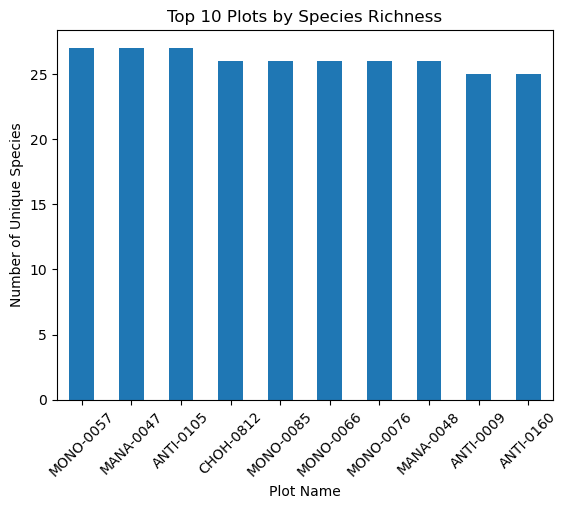

In [71]:
plt.figure()
species_richness_plot.head(10).plot(kind='bar')
plt.title('Top 10 Plots by Species Richness')
plt.xlabel('Plot Name')
plt.ylabel('Number of Unique Species')
plt.xticks(rotation=45)
plt.show()

In [72]:
species_richness_plot.describe()

count    609.000000
mean      14.922824
std        4.296451
min        4.000000
25%       12.000000
50%       14.000000
75%       18.000000
max       27.000000
Name: Common_Name, dtype: float64

## Insight: Plot-wise Species Richness

The plot-level species richness analysis reveals clear spatial variation in bird
biodiversity across the study area. The top-ranked plots record approximately 25–27
unique bird species, indicating localized biodiversity hotspots where habitat
conditions may be especially favorable.

The descriptive statistics further show that while the maximum species richness reaches
27 species per plot, the median richness is around 14 species, and the mean is
approximately 15 species. This suggests that high species richness is concentrated in a
limited number of plots, while most plots support moderate biodiversity levels.

Such spatial heterogeneity may be influenced by differences in vegetation structure,
resource availability, microclimate, or disturbance levels. These findings highlight the
importance of plot-level analysis for identifying ecologically valuable areas and
support targeted conservation or monitoring efforts.

In [75]:
# Save cleaned dataset to Processed folder (correct relative path)
processed_data_path = "../Data/Processed/cleaned_bird_observations.csv"
bird_df.to_csv(processed_data_path, index=False)

processed_data_path

'../Data/Processed/cleaned_bird_observations.csv'

## Species Activity Pattern Analysis (ID Method)

This section analyzes bird observation activity patterns based on the identification method (`ID_Method`).
Understanding how birds are detected (visual, auditory, or both) helps assess survey bias, detectability,
and reliability of species observations.

In [76]:
# Check distribution of identification methods
bird_df['ID_Method'].value_counts()

ID_Method
Singing          9863
Calling          4061
Visualization    3151
Unknown             2
Name: count, dtype: int64

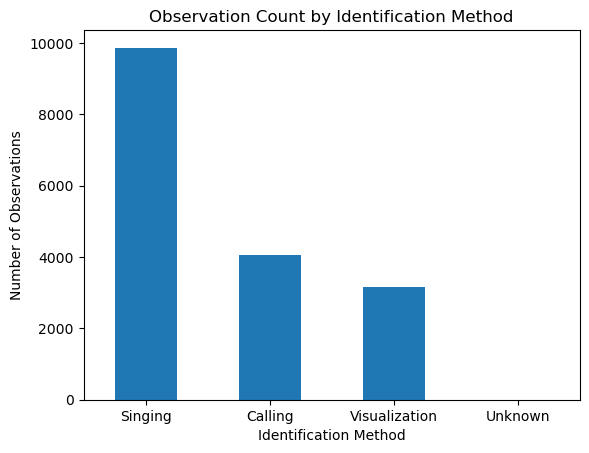

In [77]:
import matplotlib.pyplot as plt

plt.figure()
bird_df['ID_Method'].value_counts().plot(kind='bar')
plt.title('Observation Count by Identification Method')
plt.xlabel('Identification Method')
plt.ylabel('Number of Observations')
plt.xticks(rotation=0)
plt.show()

In [78]:
id_method_percentage = (
    bird_df['ID_Method']
    .value_counts(normalize=True) * 100
)

id_method_percentage

ID_Method
Singing          57.756046
Calling          23.780524
Visualization    18.451719
Unknown           0.011712
Name: proportion, dtype: float64

## Insight: Identification Method Patterns

The analysis of identification methods shows that the majority of bird observations were recorded through
**singing-based detections**, accounting for approximately **58%** of all observations. This is followed
by **calling** (around **24%**) and **visual identification** (about **18%**).

This pattern indicates that auditory cues play a dominant role in bird detection within the study area.
Many bird species are more easily detected through vocalizations than visual sightings, especially in
dense habitats such as forests where visibility is limited.

The very small proportion of observations labeled as *Unknown* suggests good data quality and consistency
in field recording practices. Overall, the reliance on auditory identification highlights the importance
of accounting for detectability bias when interpreting species abundance and activity patterns.

## Sex-wise Observation Analysis

This analysis examines how bird observations are distributed across different sex categories
(Male, Female, and Unknown). Understanding sex-wise observation patterns helps identify
potential detection biases and provides insights into species behavior and survey limitations.

In [79]:
# Observation count by sex
sex_counts = bird_df['Sex'].value_counts()
sex_counts

Sex
Undetermined    8410
Unknown         5183
Male            3338
Female           146
Name: count, dtype: int64

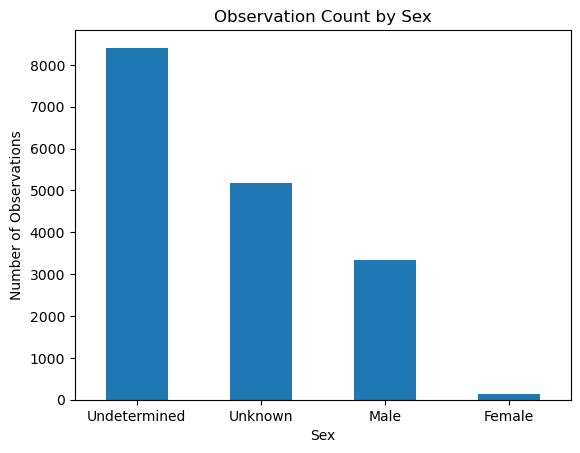

In [80]:
import matplotlib.pyplot as plt

plt.figure()
sex_counts.plot(kind='bar')
plt.title('Observation Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Observations')
plt.xticks(rotation=0)
plt.show()

In [81]:
# Percentage contribution by sex
sex_percentage = bird_df['Sex'].value_counts(normalize=True) * 100
sex_percentage

Sex
Undetermined    49.247526
Unknown         30.350764
Male            19.546759
Female           0.854951
Name: proportion, dtype: float64

## Insight: Sex-wise Observation Patterns

The sex-wise analysis shows that a large proportion of bird observations fall under
Undetermined (≈49.2%) and Unknown (≈30.4%) categories, while clearly identified Male
observations account for about 19.5% and Female observations contribute less than 1%
of the total records.

This strong skew indicates significant limitations in sex identification during field
surveys. Many bird species exhibit minimal visible sexual dimorphism, making it
difficult to determine sex through visual observation alone. Additionally, acoustic
detections such as singing often allow species identification but not reliable sex
classification, especially outside breeding contexts.

The very low proportion of female observations suggests potential detection bias, as
female birds may be less vocal or less visually conspicuous during surveys. These
findings highlight the importance of accounting for sex-identification uncertainty
when analyzing population structure, breeding behavior, and species-level ecological
patterns.

## Environmental Factors Analysis

## Observation Count by Sky Condition

This analysis examines how different sky conditions influence bird observation
counts. Weather conditions such as clear or overcast skies can affect bird
activity, visibility, and detectability during surveys.

In [82]:
# Observation count by Sky condition
sky_counts = bird_df['Sky'].value_counts()
sky_counts

Sky
Partly Cloudy          7145
Clear Or Few Clouds    5809
Cloudy/Overcast        3097
Fog                     647
Mist/Drizzle            379
Name: count, dtype: int64

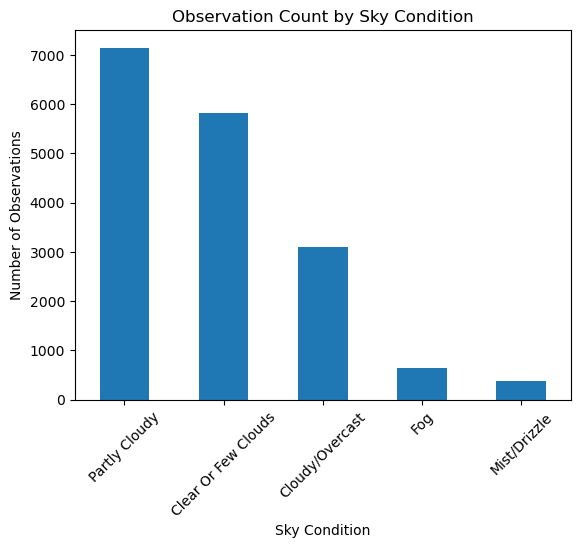

In [83]:
import matplotlib.pyplot as plt

plt.figure()
sky_counts.plot(kind='bar')
plt.title('Observation Count by Sky Condition')
plt.xlabel('Sky Condition')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45)
plt.show()

In [84]:
sky_percentage = bird_df['Sky'].value_counts(normalize=True) * 100
sky_percentage

Sky
Partly Cloudy          41.839902
Clear Or Few Clouds    34.016513
Cloudy/Overcast        18.135504
Fog                     3.788722
Mist/Drizzle            2.219359
Name: proportion, dtype: float64

The analysis shows that bird observations are most frequently recorded under partly cloudy (≈41.8%) and clear or few cloud (≈34.0%) sky conditions. Together, these favorable weather conditions account for nearly 76% of all observations, indicating that surveys are predominantly conducted when visibility and bird activity are optimal.

In contrast, cloudy/overcast conditions (≈18.1%) show a moderate reduction in observations, while fog (≈3.8%) and mist/drizzle (≈2.2%) contribute very few records. This sharp decline suggests that poor visibility and adverse weather significantly reduce bird detectability and/or survey effort.

Overall, the results highlight a strong weather-related sampling bias, where observations are concentrated under favorable sky conditions. This is important to consider when interpreting species abundance and behavior patterns, as reduced observations during foggy or rainy conditions may reflect detection limitations rather than true absence of birds.

## Observation Count by Wind Condition

This analysis examines how different wind conditions impact bird observation counts. Wind can influence bird vocalization behavior, flight activity, and observer detectability, making it an important environmental factor in bird monitoring surveys.

In [85]:
# Observation count by wind condition
wind_counts = bird_df['Wind'].value_counts()
wind_counts

Wind
Light Air Movement (1-3 Mph) Smoke Drifts     8511
Calm (< 1 Mph) Smoke Rises Vertically         4417
Light Breeze (4-7 Mph) Wind Felt On Face      3737
Gentle Breeze (8-12 Mph), Leaves In Motion     412
Name: count, dtype: int64

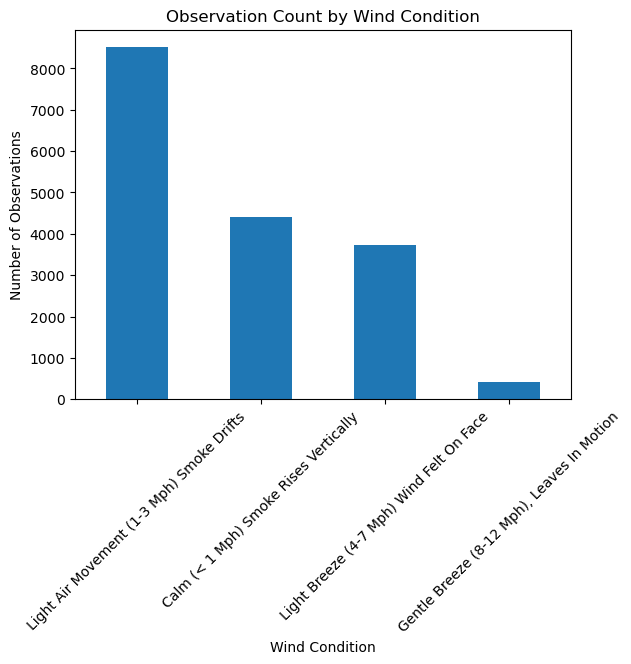

In [86]:
import matplotlib.pyplot as plt

plt.figure()
wind_counts.plot(kind='bar')
plt.title('Observation Count by Wind Condition')
plt.xlabel('Wind Condition')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45)
plt.show()

In [87]:
# Percentage contribution by wind condition
wind_percentage = bird_df['Wind'].value_counts(normalize=True) * 100
wind_percentage

Wind
Light Air Movement (1-3 Mph) Smoke Drifts     49.838965
Calm (< 1 Mph) Smoke Rises Vertically         25.865199
Light Breeze (4-7 Mph) Wind Felt On Face      21.883235
Gentle Breeze (8-12 Mph), Leaves In Motion     2.412602
Name: proportion, dtype: float64

The analysis shows that bird observations are strongly concentrated under low wind conditions. Nearly half of all observations (~49.8%) were recorded during light air movement (1–3 mph), indicating optimal conditions for bird activity and observer detectability.

Calm conditions (smoke rising vertically) also account for a substantial portion of observations (~25.9%), reinforcing the idea that minimal wind supports clearer auditory and visual detection of birds. Moderate wind conditions, such as light breeze (4–7 mph), contribute a smaller yet notable share of observations (~21.9%).

In contrast, stronger wind conditions, represented by gentle breeze (8–12 mph), show a sharp decline in observation counts (~2.4%). This suggests that increased wind likely reduces bird vocalization, limits flight activity, and interferes with sound-based identification methods.

Overall, the results highlight a clear wind-related detection bias in the dataset, emphasizing the importance of considering wind conditions when interpreting bird abundance, behavior, and survey effectiveness.

## Observation Count by Disturbance

This analysis examines how different disturbance levels influence bird observation counts. 
Disturbance can include human activity, noise, or other environmental disruptions that may 
affect bird presence, behavior, and detectability during surveys.

Understanding disturbance-wise patterns helps assess potential survey bias and interpret 
species observations in relation to habitat disturbance.

In [88]:
# Observation count by disturbance
disturbance_counts = bird_df['Disturbance'].value_counts()
disturbance_counts

Disturbance
No Effect On Count          8029
Slight Effect On Count      6750
Moderate Effect On Count    1819
Serious Effect On Count      479
Name: count, dtype: int64

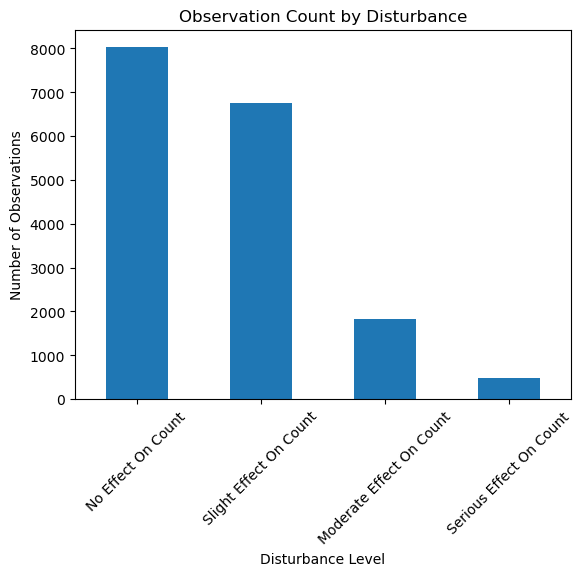

In [89]:
import matplotlib.pyplot as plt

plt.figure()
disturbance_counts.plot(kind='bar')
plt.title('Observation Count by Disturbance')
plt.xlabel('Disturbance Level')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45)
plt.show()

In [90]:
# Percentage contribution by disturbance
disturbance_percentage = bird_df['Disturbance'].value_counts(normalize=True) * 100
disturbance_percentage

Disturbance
No Effect On Count          47.016455
Slight Effect On Count      39.526849
Moderate Effect On Count    10.651754
Serious Effect On Count      2.804942
Name: proportion, dtype: float64

The disturbance-wise analysis shows that the majority of bird observations were recorded under conditions with no observable disturbance effect (≈47%) or only slight disturbance (≈40%). This indicates that most surveys were conducted in relatively stable environments where bird activity and detectability were minimally impacted.

Observation counts decline sharply as disturbance intensity increases. Moderate disturbance accounts for only about 11% of observations, while serious disturbance contributes less than 3%, suggesting that higher disturbance levels significantly reduce either bird presence or the likelihood of detection during surveys.

This pattern highlights the sensitivity of bird communities to environmental disturbance and emphasizes the importance of minimizing disturbance during monitoring activities. It also suggests that comparisons of species abundance and richness should account for disturbance levels to avoid bias caused by reduced detectability in highly disturbed conditions.

## Environmental Effects on Bird Observations

The environmental analysis indicates that **weather conditions and disturbance levels play a significant role in bird observation outcomes**.

Most bird observations were recorded under **favorable sky conditions**, particularly *partly cloudy* and *clear or few clouds*, suggesting improved visibility and higher bird activity during such conditions. Observation counts declined noticeably under adverse conditions like fog and mist.

Similarly, **calm and low-wind conditions** accounted for the majority of observations. As wind intensity increased, observation counts dropped, likely due to reduced bird vocalization, movement, and observer efficiency.

Disturbance analysis shows that **areas with no or slight disturbance recorded the highest number of observations**, while moderate and severe disturbance levels were associated with substantially fewer records. This highlights the impact of human activity and environmental disruption on bird presence and detectability.

Overall, these results emphasize the importance of **considering environmental and disturbance factors when interpreting bird observation data**, as they can introduce observational bias and influence ecological conclusions.

## Overall Conclusion and Key Findings

This project conducted a comprehensive analysis of bird species observations across
forest and grassland ecosystems to understand patterns in biodiversity, species
distribution, and environmental influences on bird detection.

The analysis revealed that both forest and grassland ecosystems support high and nearly
equal species richness, highlighting the ecological importance of maintaining diverse
habitat types. Species-level analysis showed that a small group of commonly observed
species contributed a significant portion of observations, while a large number of
less frequently observed species collectively enhanced overall biodiversity.

Temporal analysis indicated variation in observation counts across visits, with a
general decline in later visits likely influenced by seasonal changes, survey effort,
and detectability rather than actual species loss. Spatial analysis identified
plot-level biodiversity hotspots, demonstrating that bird diversity is unevenly
distributed across the landscape.

Environmental factors played a crucial role in shaping observation outcomes. Favorable
sky and wind conditions, along with minimal disturbance, were associated with higher
observation counts, while adverse weather and increased disturbance corresponded to
reduced detections. These findings emphasize the need to account for environmental and
survey-related biases when interpreting bird monitoring data.

Overall, this project highlights the value of integrating temporal, spatial, species,
and environmental analyses to gain a holistic understanding of avian biodiversity.
The insights generated from this study can support ecological monitoring, conservation
planning, and future data-driven wildlife management efforts.

In [91]:
# Observation count by PIF Watchlist Status
pif_counts = bird_df['PIF_Watchlist_Status'].value_counts()
pif_counts

PIF_Watchlist_Status
False    16699
True       378
Name: count, dtype: int64

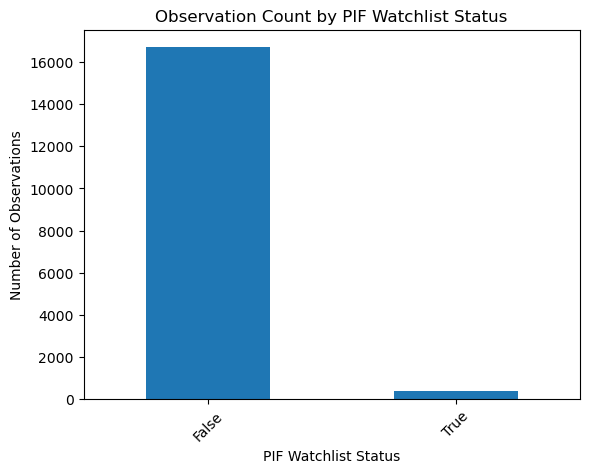

In [92]:
import matplotlib.pyplot as plt

plt.figure()
pif_counts.plot(kind='bar')
plt.title('Observation Count by PIF Watchlist Status')
plt.xlabel('PIF Watchlist Status')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45)
plt.show()

In [93]:
# Percentage contribution by PIF Watchlist Status
pif_percentage = bird_df['PIF_Watchlist_Status'].value_counts(normalize=True) * 100
pif_percentage

PIF_Watchlist_Status
False    97.786496
True      2.213504
Name: proportion, dtype: float64

## PIF Watchlist Status and Conservation Priority

The analysis of PIF Watchlist Status shows that the vast majority of bird observations (approximately 97.8%) belong to species that are not currently listed on the Partners in Flight (PIF) Watchlist. This indicates that the forest and grassland ecosystems studied support a large population of common and relatively stable bird species.

However, a small but important proportion of observations (about 2.2%) correspond to PIF Watchlist species, which are considered to be of higher conservation concern. Although these species occur less frequently in the dataset, their presence highlights the ecological significance of the study area as a habitat for at-risk bird populations.

This finding underscores the importance of continued monitoring and habitat management in both ecosystems. Even limited occurrences of watchlist species can be critical for conservation planning, as they help identify areas that contribute to the persistence and protection of vulnerable bird species.

## Regional Stewardship Status Analysis

This analysis examines the distribution of bird observations across different Regional Stewardship Status categories.  
Regional stewardship status highlights species that require special conservation attention at a regional level, even if they are not globally threatened.

In [94]:
# Observation count by Regional Stewardship Status
stewardship_counts = bird_df['Regional_Stewardship_Status'].value_counts()
stewardship_counts

Regional_Stewardship_Status
False    13092
True      3985
Name: count, dtype: int64

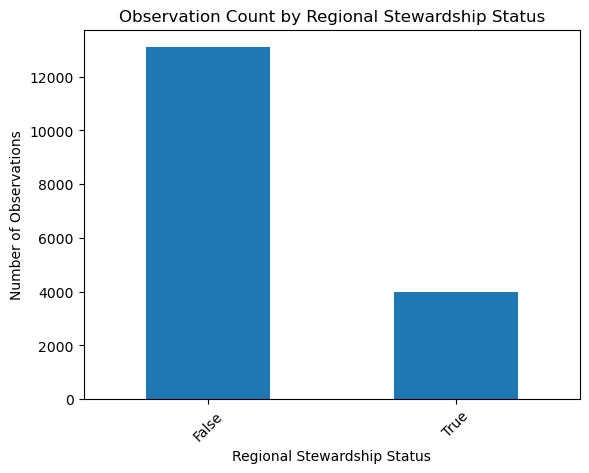

In [95]:
import matplotlib.pyplot as plt

plt.figure()
stewardship_counts.plot(kind='bar')
plt.title('Observation Count by Regional Stewardship Status')
plt.xlabel('Regional Stewardship Status')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45)
plt.show()

In [96]:
# Percentage contribution by Regional Stewardship Status
stewardship_percentage = (
    bird_df['Regional_Stewardship_Status']
    .value_counts(normalize=True) * 100
)

stewardship_percentage

Regional_Stewardship_Status
False    76.66452
True     23.33548
Name: proportion, dtype: float64

### Insight: Regional Stewardship Status and Conservation Priority

The analysis shows that approximately **23.3% of total bird observations** belong to species marked under **Regional Stewardship Status**, while **76.7%** of observations correspond to species without regional stewardship concern.

Although regionally significant species form a smaller proportion of total observations, their presence across a substantial number of records highlights their **ecological importance at a regional scale**. These species may not be globally threatened, but they require **localized conservation attention** due to habitat sensitivity, population trends, or regional decline risks.

This finding emphasizes the need for **region-specific conservation strategies**, as monitoring and protecting stewardship-listed species can help maintain regional biodiversity and ecosystem stability. Targeted habitat management in forest and grassland ecosystems can therefore play a critical role in supporting these priority species.

## Conservation Priority by Taxonomic Classification

This analysis examines bird observations across taxonomic identifiers (NPSTaxonCode).  
Taxonomic-level analysis helps identify species diversity distribution and supports conservation planning by highlighting frequently observed taxonomic groups.

In [97]:
# Observation count by NPSTaxonCode
taxon_counts = bird_df['NPSTaxonCode'].value_counts()
taxon_counts.head(10)

NPSTaxonCode
93587.0     694
88350.0     646
94228.0     595
266957.0    541
85846.0     486
85824.0     436
84865.0     398
88038.0     310
92689.0     303
87136.0     294
Name: count, dtype: int64

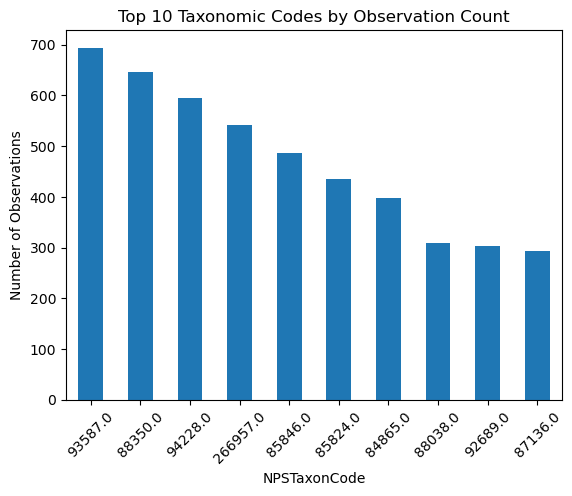

In [98]:
import matplotlib.pyplot as plt

plt.figure()
taxon_counts.head(10).plot(kind='bar')
plt.title('Top 10 Taxonomic Codes by Observation Count')
plt.xlabel('NPSTaxonCode')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45)
plt.show()

In [99]:
# Percentage contribution of top taxonomic codes
taxon_percentage = (
    bird_df['NPSTaxonCode']
    .value_counts(normalize=True) * 100
)

taxon_percentage.head(10)

NPSTaxonCode
93587.0     8.120758
88350.0     7.559092
94228.0     6.962322
266957.0    6.330447
85846.0     5.686871
85824.0     5.101802
84865.0     4.657150
88038.0     3.627428
92689.0     3.545518
87136.0     3.440206
Name: proportion, dtype: float64

### Insights - Conservation Priority by Taxonomic Classification

The taxonomic analysis reveals that bird observations are not evenly distributed across taxonomic codes. A small number of NPSTaxonCodes contribute a relatively higher proportion of total observations, indicating that certain taxonomic groups are more frequently encountered during surveys.

The top taxonomic codes individually contribute between approximately 3% and 8% of total observations, suggesting moderate concentration rather than dominance by a single taxonomic group. This pattern reflects healthy species diversity, with multiple taxa being regularly observed across the study area.

From a conservation perspective, these frequently observed taxonomic groups represent important components of the ecosystem and should continue to be monitored for population stability. At the same time, the presence of many lower-frequency taxonomic codes highlights the need for targeted conservation attention toward less commonly observed species, which may be more vulnerable to habitat changes or survey limitations.

Overall, taxonomic-level analysis supports balanced conservation planning by identifying both commonly observed groups for long-term monitoring and rarer taxa that may require focused conservation strategies.

## Conservation Insights Summary and Recommendations

The conservation-focused analyses provide important insights into species status, habitat significance, and monitoring priorities within forest and grassland ecosystems.

Observations of species listed under the PIF Watchlist account for a small proportion of total records, indicating that most frequently observed species are currently not of immediate conservation concern. However, the presence of PIF-listed species, even at lower observation counts, highlights the importance of continued monitoring to detect early signs of population decline.

Regional Stewardship Status analysis shows that a notable portion of observations belongs to species of regional conservation interest. This emphasizes the ecological importance of the study area and reinforces the need for sustained habitat protection and region-specific conservation strategies.

Taxonomic classification analysis reveals that observations are distributed across multiple taxonomic groups rather than being dominated by a single group. This reflects healthy biodiversity but also suggests that conservation planning should balance efforts between commonly observed taxa and less frequently recorded groups that may be more vulnerable or under-detected.

### Conservation Recommendations
- Maintain long-term monitoring programs to track trends in both common and conservation-priority species.
- Prioritize habitat preservation in areas supporting regionally significant species.
- Implement targeted surveys for low-frequency and PIF-listed species to reduce detection bias.
- Integrate taxonomic-level insights into conservation planning to ensure balanced ecosystem management.
- Use these findings to support data-driven decision-making for biodiversity protection and policy development.

Overall, the conservation analysis confirms that forest and grassland ecosystems in the study area support diverse bird communities and require continued monitoring and adaptive conservation strategies to ensure long-term ecological sustainability.